# plotly
* 파이썬 동적 시각화 도구
* 인터페이스만 파이썬이고 내부는 모두 자바스크립트

In [12]:
# 라이브러리 로드
import plotly.express as px
import pandas as pd

In [ ]:
# 만약 그래프가 노트북에 표시되지 않을 때
# from plotly.offline import iplot, init_notebook_mode
# from plotly.subplots import make_subplots
# init_notebook_mode()

In [8]:
# px 내장 data 호출
df = px.data.stocks()
df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


# 일별 수익률 선그래프

In [11]:
px.line(df, x="date", y="GOOG", title="일별 시세")

<AxesSubplot:xlabel='date'>

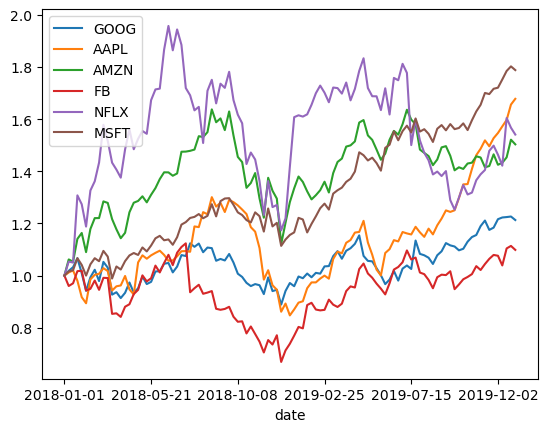

In [15]:
# 판다스 시각화
df.set_index("date").plot()

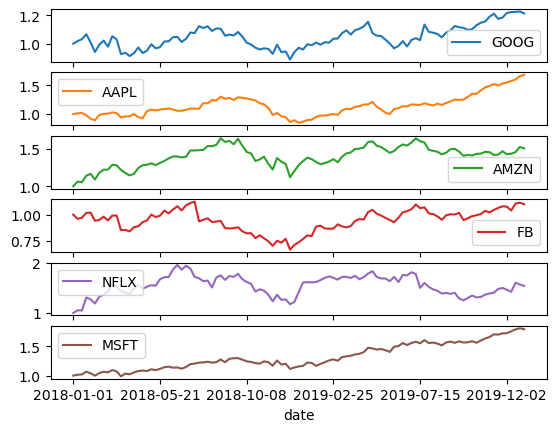

In [18]:
# pandas subplots
df.set_index("date").plot(subplots=True);

In [14]:
px.line(df.set_index("date"))

# 일별 수익률 막대그래프

In [25]:
# 전처리를 위해 날짜를 set_index
df_1 = df.set_index("date") - 1
df_1.head(2)

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988


In [29]:
# 셋 모두 같은 결과
px.bar(df_1, x=df_1.index, y="GOOG")
px.bar(df_1, y="GOOG")
px.bar(df_1["GOOG"])

<AxesSubplot:xlabel='date'>

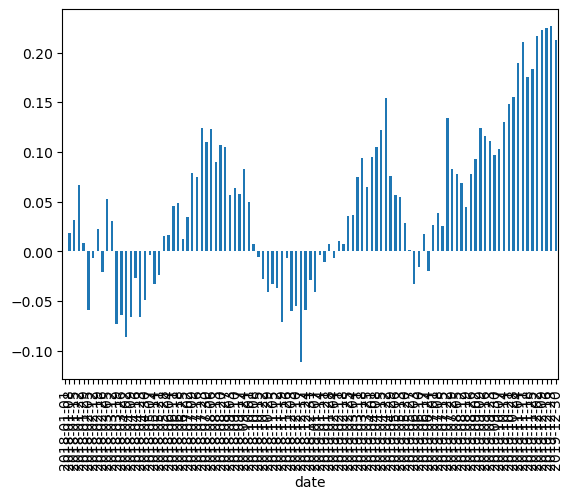

In [31]:
# pandas로 그리기
df_1["GOOG"].plot(kind="bar")

# facet_col을 이용한 서브플롯

In [32]:
df_1.columns

Index(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [36]:
# columns들의 이름 지정
# 서브플롯을 그리기 위해선 지정해줘야 함
df_1.columns.name = "company"
df_1.columns

Index(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object', name='company')

In [35]:
# facet_col="company" : subplot 기준
# facet_col_wrap=2 : 한 줄에 그래프 몇개씩
px.area(df_1, facet_col="company", facet_col_wrap=2)

# 여러 종목을 하나의 그래프로 표현

In [39]:
# hover_data = {"date" "|%Y-%m-%d"} : 날짜 형식
px.line(df, hover_data = {"date": "|%Y-%m-%d"})

# Range Slider로 시계열 그래프

In [41]:
fig = px.line(df_1["GOOG"])
fig.update_xaxes(rangeslider_visible=True)

# Simple Candlestick with Pandas

In [47]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

# 그래프 아래 슬라이드 끄기
# fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# OHLC 그래프

In [44]:
fig = go.Figure(data=[go.Ohlc(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

# 직접 수집한 주가 데이터로 시각화

In [48]:
import FinanceDataReader as fdr

In [52]:
# 미국 주식의 경우 종목 코드 대신 "Ticker" 사용
# 약자와 비슷
# 맨체스터 유나이티드 : MANU
fdr.DataReader('MANU')

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2012-08-13,14.15,13.97,15.27,13.96,2060000.0,0.0107
2012-08-14,14.20,14.20,14.48,14.15,204800.0,0.0035
2012-08-15,14.05,14.42,14.88,14.03,563490.0,-0.0106
2012-08-16,13.77,14.07,14.08,13.29,1610000.0,-0.0199
2012-08-17,13.42,13.82,13.84,13.36,532470.0,-0.0254
...,...,...,...,...,...,...
2022-09-28,12.70,12.77,12.78,12.59,676100.0,-0.0078
2022-09-29,12.86,12.57,12.87,12.44,628590.0,0.0126
2022-09-30,13.27,12.90,13.35,12.76,691580.0,0.0319


In [64]:
# 맨체스터 유나이티드 : MANU
# 2022년 데이터로 한정
manu = fdr.DataReader('MANU', "2022")
manu

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-03,14.68,14.26,14.68,14.25,303750.0,0.0309
2022-01-04,14.66,14.76,14.81,14.60,256560.0,-0.0014
2022-01-05,14.61,14.65,14.78,14.52,380940.0,-0.0034
2022-01-06,14.88,14.58,15.05,14.56,382530.0,0.0185
2022-01-07,14.76,14.88,14.94,14.71,356090.0,-0.0081
...,...,...,...,...,...,...
2022-09-28,12.70,12.77,12.78,12.59,676100.0,-0.0078
2022-09-29,12.86,12.57,12.87,12.44,628590.0,0.0126
2022-09-30,13.27,12.90,13.35,12.76,691580.0,0.0319


## 선 그래프

In [70]:
px.line(manu["Change"])

## Candlestick with Range Slider

In [69]:
fig = go.Figure(data=[go.Candlestick(x=manu.index,
                open=manu['Open'],
                high=manu['High'],
                low=manu['Low'],
                close=manu['Close'])])

fig.show()

## OHLC

In [67]:
fig = go.Figure(data=[go.Ohlc(x=manu.reset_index()['Date'],
                open=manu['Open'],
                high=manu['High'],
                low=manu['Low'],
                close=manu['Close'])])

fig.show()